<a href="https://colab.research.google.com/github/aadhi-13/wildlife-Monitor/blob/main/wildlife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%cd /content/drive/MyDrive/dataset/


/content/drive/MyDrive/dataset


In [ ]:
!unzip "archive.zip"


Streaming output truncated to the last 5000 lines.
  inflating: SAS-KIIT/folder_4/4_Harmonium_379.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_383.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_390.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_394.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_400.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_407.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_411.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_425.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_49.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_52.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_65.wav  
  inflating: SAS-KIIT/folder_4/4_Harmonium_9.wav  
  inflating: SAS-KIIT/folder_4/5_Dhak_102.wav  
  inflating: SAS-KIIT/folder_4/5_Dhak_114.wav  
  inflating: SAS-KIIT/folder_4/5_Dhak_12.wav  
  inflating: SAS-KIIT/folder_4/5_Dhak_136.wav  
  inflating: SAS-KIIT/folder_4/5_Dhak_161.wav  
  inflating: SAS-KIIT/folder_4/5_Dhak_164.wav  
  inflating: SAS-KIIT/folder_4/

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# This is where you define what 'create_spectrogram' is
def create_spectrogram(audio_path, n_mels=128, n_fft=2048, hop_length=512):
    y, sr = librosa.load(audio_path, sr=22050)

    if librosa.get_duration(y=y, sr=sr) < 3.0:
        return None

    mel_spectrogram = librosa.feature.melspectrogram(
        y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
    )

    spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    spectrogram_normalized = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db))

    return spectrogram_normalized

# Mount Google Drive if you haven't already
# from google.colab import drive
# drive.mount('/content/drive')

# Define the paths to your data
DATA_PATH = '/content/drive/MyDrive/dataset/SAS-KIIT'
METADATA_FILE = os.path.join(DATA_PATH, 'metadata.csv')

# Load the metadata into a Pandas DataFrame
df = pd.read_csv(METADATA_FILE)

# Create lists to store your data and labels
spectrograms = []
labels = []
processed_files_count = 0

# Use os.walk to iterate through all subfolders
for root, dirs, files in os.walk(DATA_PATH):
    for file_name in files:
        # Check if the file is an audio file and present in the metadata
        if file_name.endswith(('.wav', '.mp3', '.ogg')) and file_name in df['slice_file_name'].values:
            audio_path = os.path.join(root, file_name)

            # Find the corresponding label from the metadata
            label = df.loc[df['slice_file_name'] == file_name, 'class_name'].iloc[0]

            spectrogram = create_spectrogram(audio_path)

            if spectrogram is not None:
                spectrograms.append(spectrogram)
                labels.append(label)
                processed_files_count += 1
                if processed_files_count % 100 == 0:
                    print(f"Processed {processed_files_count} files.")

print(f"Finished processing. Total spectrograms created: {len(spectrograms)}")

# Convert lists to NumPy arrays
X = np.array(spectrograms)
y = np.array(labels)

Processed 100 files.
Processed 200 files.
Processed 300 files.
Processed 400 files.
Processed 500 files.
Processed 600 files.
Processed 700 files.
Processed 800 files.
Processed 900 files.
Processed 1000 files.
Processed 1100 files.
Processed 1200 files.
Processed 1300 files.
Processed 1400 files.
Processed 1500 files.
Processed 1600 files.
Processed 1700 files.
Processed 1800 files.
Processed 1900 files.
Processed 2000 files.
Processed 2100 files.
Processed 2200 files.
Processed 2300 files.
Processed 2400 files.
Processed 2500 files.
Processed 2600 files.
Processed 2700 files.
Processed 2800 files.
Processed 2900 files.
Processed 3000 files.
Processed 3100 files.
Processed 3200 files.
Processed 3300 files.
Processed 3400 files.
Processed 3500 files.
Processed 3600 files.
Processed 3700 files.
Processed 3800 files.
Processed 3900 files.
Processed 4000 files.
Processed 4100 files.
Processed 4200 files.
Processed 4300 files.
Processed 4400 files.
Processed 4500 files.
Processed 4600 file

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode string labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (7560, 128, 173)
Validation set shape: (1890, 128, 173)


In [ ]:
# After generating X and y
# Define a new folder in your Drive for processed data
PROCESSED_DATA_PATH = '/content/drive/MyDrive/dataset/processed_dataset/'
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

# Save the arrays
np.save(os.path.join(PROCESSED_DATA_PATH, 'spectrograms.npy'), X)
np.save(os.path.join(PROCESSED_DATA_PATH, 'labels.npy'), y)

print("Processed data saved to Google Drive.")

Processed data saved to Google Drive.


In [ ]:
# In a new Colab session
from google.colab import drive
import numpy as np
import os

drive.mount('/content/drive')

PROCESSED_DATA_PATH = '/content/drive/MyDrive/dataset/processed_dataset/'

# Load the processed data
X = np.load(os.path.join(PROCESSED_DATA_PATH, 'spectrograms.npy'))
y = np.load(os.path.join(PROCESSED_DATA_PATH, 'labels.npy'))

print("Processed data loaded successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed data loaded successfully.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Resizing
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [ ]:
# 1. Encode the string labels into integers
from sklearn.preprocessing import LabelEncoder

# Now you can use LabelEncoder without a NameError
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# 2. Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 3. Reshape the data for CNN input
# CNNs expect a 4D tensor (batch_size, height, width, channels)
# Our spectrograms are 3D (num_samples, height, width), so we need to add the channels dimension.
# For grayscale images (like spectrograms), the channel count is 1.
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 4. One-hot encode the integer labels
# to_categorical() is a utility function to convert class vectors (integers)
# to binary class matrices (one-hot encoding) for use with categorical_crossentropy loss.
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

Number of classes: 21


In [ ]:
# Get the input shape
input_shape = X_train.shape[1:]

# Build the Sequential model
model = Sequential([
    tf.keras.Input(shape=input_shape),
    # Convolutional layers to learn features
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten and Dense layers for classification
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5), # Regularization
    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,038,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,058,325 (19.30 MB)

 Trainable params: 5,058,325 (19.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the path to save the checkpoints in your Google Drive
checkpoint_path = '/content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_{epoch:02d}.h5'
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False, # Set to True if you only want to save the weights
    save_freq='epoch',
    verbose=1
)

# Pass the callback to the model.fit() function
history = model.fit(
    X_train, y_train_one_hot,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val_one_hot),
    callbacks=[checkpoint_callback]
)

# To resume training from a checkpoint, load the model file and continue
# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_15.h5')
# loaded_model.fit(X_train, y_train_one_hot, epochs=20, initial_epoch=15, ...)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1301 - loss: 2.8241
Epoch 1: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_01.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.1305 - loss: 2.8226 - val_accuracy: 0.5780 - val_loss: 1.6587
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4053 - loss: 1.7956
Epoch 2: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_02.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.4056 - loss: 1.7948 - val_accuracy: 0.8525 - val_loss: 0.8204
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5217 - loss: 1.3686
Epoch 3: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_03.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.5218 - loss: 1.3683 - val_accuracy: 0.9146 - val_loss: 0.4797
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5836 - loss: 1.1727
Epoch 4: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_04.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.5837 - loss: 1.1725 - val_accuracy: 0.9337 - val_loss: 0.3207
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6275 - loss: 1.0534
Epoch 5: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_05.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.6276 - loss: 1.0532 - val_accuracy: 0.9492 - val_loss: 0.2642
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6875 - loss: 0.8634
Epoch 6: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_06.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.6876 - loss: 0.8634 - val_accuracy: 0.9704 - val_loss: 0.1567
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7092 - loss: 0.7902
Epoch 7: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_07.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.7092 - loss: 0.7901 - val_accuracy: 0.9725 - val_loss: 0.1187
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7063 - loss: 0.7631
Epoch 8: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_08.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.7064 - loss: 0.7630 - val_accuracy: 0.9774 - val_loss: 0.1032
Epoch 9/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7374 - loss: 0.6974
Epoch 9: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_09.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.7374 - loss: 0.6974 - val_accuracy: 0.9887 - val_loss: 0.0727
Epoch 10/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7390 - loss: 0.6931
Epoch 10: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_10.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.7391 - loss: 0.6931 - val_accuracy: 0.9802 - val_loss: 0.0925
Epoch 11/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7452 - loss: 0.6795
Epoch 11: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_11.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.7452 - loss: 0.6794 - val_accuracy: 0.9845 - val_loss: 0.0959
Epoch 12/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7457 - loss: 0.6708
Epoch 12: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_12.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.7457 - loss: 0.6706 - val_accuracy: 0.9880 - val_loss: 0.0644
Epoch 13/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7621 - loss: 0.6319
Epoch 13: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_13.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.7621 - loss: 0.6318 - val_accuracy: 0.9915 - val_loss: 0.0618
Epoch 14/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7473 - loss: 0.6423
Epoch 14: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_14.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.7474 - loss: 0.6423 - val_accuracy: 0.9873 - val_loss: 0.0590
Epoch 15/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7600 - loss: 0.6164
Epoch 15: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_15.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.7601 - loss: 0.6162 - val_accuracy: 0.9887 - val_loss: 0.0493
Epoch 16/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7782 - loss: 0.5673
Epoch 16: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_16.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.7782 - loss: 0.5673 - val_accuracy: 0.9845 - val_loss: 0.0507
Epoch 17/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7752 - loss: 0.5766
Epoch 17: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_17.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.7752 - loss: 0.5766 - val_accuracy: 0.9880 - val_loss: 0.0526
Epoch 18/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7768 - loss: 0.5672
Epoch 18: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_18.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.7768 - loss: 0.5672 - val_accuracy: 0.9824 - val_loss: 0.0699
Epoch 19/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7925 - loss: 0.5469
Epoch 19: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_19.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.7925 - loss: 0.5469 - val_accuracy: 0.9873 - val_loss: 0.0440
Epoch 20/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7980 - loss: 0.5346
Epoch 20: saving model to /content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_20.h5


207/207 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.7980 - loss: 0.5346 - val_accuracy: 0.9852 - val_loss: 0.0541


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the path to your last saved checkpoint file
checkpoint_path = '/content/drive/MyDrive/Trained_Models/checkpoints/model_checkpoint_17.h5'

# Load the model from the checkpoint
try:
    model = load_model(checkpoint_path)
    print("Model checkpoint loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# --- NEW STEP: Recompile the model with the same parameters ---
# This creates a new optimizer instance that is compatible with the loaded model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("Model recompiled successfully.")

# Define the path for the final model
final_model_path = '/content/drive/MyDrive/Trained_Models/wildlife_classifier.h5'

# Resume training from the loaded model
print(f"Resuming training from epoch 17 for a total of 20 epochs...")

# Make sure X_train, y_train_one_hot, X_val, y_val_one_hot are available in the session.
history = model.fit(
    X_train, y_train_one_hot,
    epochs=20, # The total number of epochs you want to reach
    initial_epoch=17, # The epoch to resume from
    batch_size=32,
    validation_data=(X_val, y_val_one_hot)
)

print("\n--- Training Complete. ---")

# Evaluate the final model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

# Save the final trained model to Google Drive
os.makedirs(os.path.dirname(final_model_path), exist_ok=True)
model.save(final_model_path)
print("\nFinal model saved to Google Drive.")

Model checkpoint loaded successfully.
Model recompiled successfully.
Resuming training from epoch 17 for a total of 20 epochs...
Epoch 18/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.7782 - loss: 0.5681 - val_accuracy: 0.9880 - val_loss: 0.0602
Epoch 19/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.7721 - loss: 0.5931 - val_accuracy: 0.9887 - val_loss: 0.0417
Epoch 20/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.7881 - loss: 0.5359 - val_accuracy: 0.9894 - val_loss: 0.0384

--- Training Complete. ---
45/45 - 19s - 433ms/step - accuracy: 0.9965 - loss: 0.0200



Final Test Accuracy: 99.65%
Final Test Loss: 0.0200

Final model saved to Google Drive.


In [ ]:
from tensorflow.keras.models import load_model
import os

# Define the path where the model is saved in Google Drive
model_save_path = '/content/drive/MyDrive/Trained_Models/wildlife_classifier.h5'

# Load the model from the specified path
loaded_model = load_model(model_save_path)

print("Model loaded successfully from Google Drive.")

# Evaluate the loaded model on the test set
# Make sure X_test and y_test_one_hot are available in the current session
test_loss_loaded, test_acc_loaded = loaded_model.evaluate(X_test, y_test_one_hot, verbose=2)

print(f"\nAccuracy of the loaded model on the test set: {test_acc_loaded*100:.2f}%")

Model loaded successfully from Google Drive.


NameError: name 'X_test' is not defined

In [ ]:
# Re-run the data splitting and preparation cell to define X_test and y_test_one_hot
# This assumes the cell with id QmnqgoVyObQj contains the necessary code
# If you moved or changed that cell, you might need to adjust this.
# from google.colab import drive
# import numpy as np
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

# drive.mount('/content/drive')

# PROCESSED_DATA_PATH = '/content/drive/MyDrive/dataset/processed_dataset/'

# # Load the processed data
# X = np.load(os.path.join(PROCESSED_DATA_PATH, 'spectrograms.npy'))
# y = np.load(os.path.join(PROCESSED_DATA_PATH, 'labels.npy'))

# # Encode the string labels into integers
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
# )
# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
# )

# # Reshape the data for CNN input
# X_test = np.expand_dims(X_test, axis=-1)

# # One-hot encode the integer labels
# y_test_one_hot = to_categorical(y_test, num_classes)

# If cell QmnqgoVyObQj is still in your notebook, you can simply run it.
# You may need to manually run the cell above this one as well if it loads data.
# Assuming the data loading cell (4PSN9deXaEWh) and the splitting cell (QmnqgoVyObQj)
# are present and haven't been significantly altered, just run cell QmnqgoVyObQj.
# If not, copy the relevant code from QmnqgoVyObQj here.

# This code block is a placeholder. You need to manually run the cell
# with id QmnqgoVyObQj in your notebook to define X_test and y_test_one_hot.
# After running that cell successfully, you can then run the cell above (844e4ab4).

print("Please run the cell with id QmnqgoVyObQj to define X_test and y_test_one_hot, then run the current cell again.")

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from google.colab import drive

# Mount Google Drive
# drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/Trained_Models/wildlife_classifier.h5'
model = tf.keras.models.load_model(model_path)

# You'll need the expected input shape from your model to ensure consistency
input_shape = model.input_shape[1:]
target_height, target_width, _ = input_shape

In [ ]:
def preprocess_audio_for_inference(audio_path, target_sr=22050, segment_duration=4, n_mels=128, n_fft=2048, hop_length=512):
    """
    Loads an audio file, pads it to the target duration, and generates a Mel-spectrogram.

    Args:
        audio_path (str): The path to the input audio file.
        target_sr (int): The target sample rate.
        segment_duration (int): The required duration of the audio segment in seconds.

    Returns:
        np.ndarray: The processed spectrogram, or None if the audio is unreadable.
    """
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=target_sr, mono=True)

        # Pad the audio to the required segment duration with silence
        # Calculate the number of samples needed for the target duration
        target_length = segment_duration * sr

        # Pad the audio with zeros at the end
        if len(y) < target_length:
            y_padded = librosa.util.fix_length(y, size=target_length)
        else:
            y_padded = y[:target_length]

        # Generate the Mel-spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(
            y=y_padded, sr=target_sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
        )

        # Convert to a decibel scale
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Normalize the spectrogram
        spectrogram_normalized = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db))

        # The model's input shape requires a channel dimension
        spectrogram_normalized = np.expand_dims(spectrogram_normalized, axis=-1)

        # Add a batch dimension since the model expects a batch of inputs
        spectrogram_normalized = np.expand_dims(spectrogram_normalized, axis=0)

        return spectrogram_normalized

    except Exception as e:
        print(f"Error processing audio file: {audio_path}. Error: {e}")
        return None

In [ ]:
# Define the path to your 2-second audio file in Google Drive
short_audio_path = '/content/drive/MyDrive/dataset/tiger/tiger-roar-loudly-193229.wav'

# Preprocess the audio for inference
preprocessed_spectrogram = preprocess_audio_for_inference(short_audio_path)


if preprocessed_spectrogram is not None:
    # Make a prediction
    raw_prediction = model.predict(preprocessed_spectrogram, verbose=0)

    # Get the predicted class index (the index with the highest probability)
    predicted_class_index = np.argmax(raw_prediction)

    # Get the predicted class name from the LabelEncoder's classes array
    # Need to load LabelEncoder and fit it to the original labels first
    from sklearn.preprocessing import LabelEncoder
    # Assuming 'y' (original string labels) is available from previous cells
    # If not, you would need to load it from the saved processed data
    PROCESSED_DATA_PATH = '/content/drive/MyDrive/dataset/processed_dataset/'
    y = np.load(os.path.join(PROCESSED_DATA_PATH, 'labels.npy'))
    label_encoder = LabelEncoder()
    label_encoder.fit(y)
    class_names = label_encoder.classes_

    predicted_class_name = class_names[predicted_class_index]

    # Get the confidence score
    confidence_score = raw_prediction[0][predicted_class_index]

    # Print the results
    print("--------------------------------------------------------------------")
    print(f"Prediction for '{os.path.basename(short_audio_path)}':")
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Confidence Score: {confidence_score*100:.2f}%")
else:
    print(f"Failed to process audio file at {short_audio_path}")

--------------------------------------------------------------------
Prediction for 'tiger-roar-loudly-193229.wav':
Predicted Class: Rickshaw_Horn
Confidence Score: 100.00%


In [ ]:
import pandas as pd

# Assuming your metadata.csv is in the dataset folder
metadata_path = '/content/drive/MyDrive/dataset/SAS-KIIT/metadata.csv'
df = pd.read_csv(metadata_path)

# Get the counts for each class
class_counts = df['class_name'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
class_name
Tanpura                     450
Traditional_Song            450
Railway_Engine              450
Children_class_noise        450
Harmonium                   450
Dhak                        450
Tabla                       450
Azan                        450
Church_Prayer               450
Irrigation_Engine           450
Ektara                      450
Launch_Engine               450
Flute                       450
Bhuddist_Prayer             450
Fish_market                 450
Tiger                       450
Elephant                    450
Kalboishakhi_Storm          450
Sanatan_Religion_Aroti      450
Rickshaw_Horn               450
Afganisthan_Pashto_Music    450
Name: count, dtype: int64


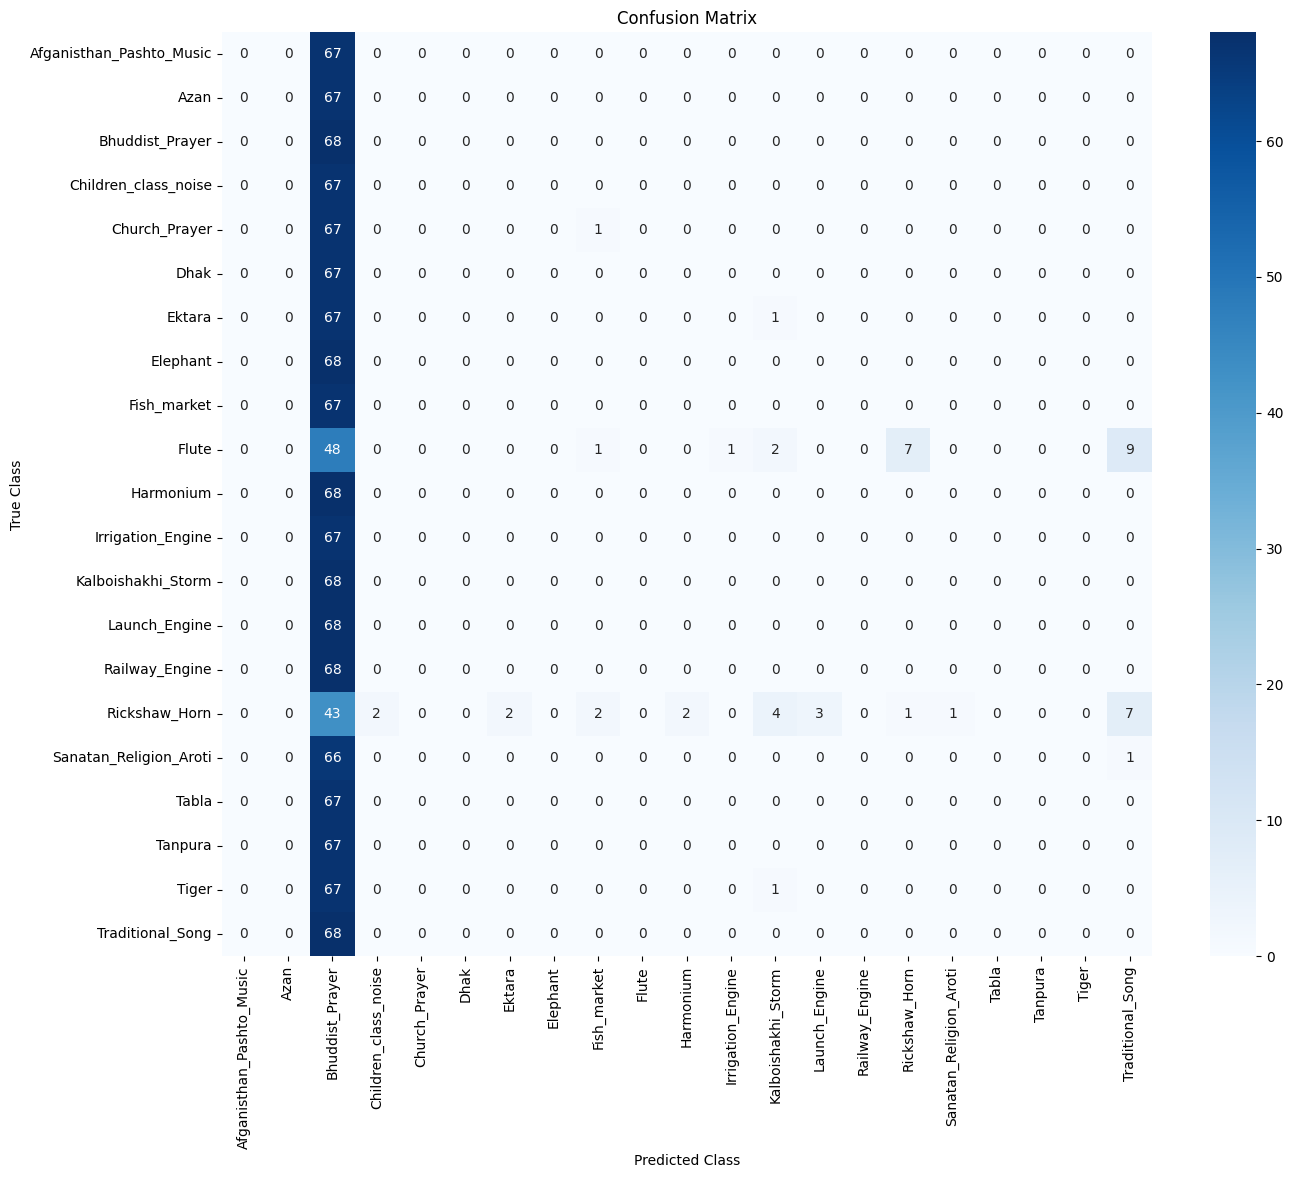

Confusion matrix generated successfully.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# --- Step 1: Make Predictions on the Test Set ---
# The loaded model's 'predict' method returns probabilities.
# Assuming 'model' is your trained model object.
# Assuming 'X_test' contains your test set spectrograms.
predictions = model.predict(X_test, verbose=0)

# --- Step 2: Decode Labels from One-Hot Encoding ---
# We need to convert the one-hot encoded labels back to a single class index.
y_test_classes = np.argmax(y_test_one_hot, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

# --- Step 3: Generate the Confusion Matrix ---
# The confusion_matrix function compares the true labels with the predicted labels.
cm = confusion_matrix(y_test_classes, predicted_classes)

# --- Step 4: Visualize the Confusion Matrix as a Heatmap ---
# Re-initialize the LabelEncoder and fit it to the original labels to get class names
# Assuming 'y' (original string labels) is available from previous cells
label_encoder = LabelEncoder()
label_encoder.fit(y) # Fit the encoder with the original labels to get the classes
class_names = label_encoder.classes_ # Get the class names


plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

print("Confusion matrix generated successfully.")